<a href="https://colab.research.google.com/github/harikrishnareddymallavarapu/Masters/blob/main/Masters_3_LDA_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


In [ ]:
%%capture
!pip install pyLDAvis==2.1.2
!python -m spacy download en_core_web_md

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import pickle

pkl_file = open('drive/My Drive/Top-Ex/lda_model_20.pkl', 'rb')
lda_model = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_data_lemmatized.pkl', 'rb')
data_lemmatized = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_id2word.pkl', 'rb')
id2word = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_corpus.pkl', 'rb')
corpus = pickle.load(pkl_file)
pkl_file.close()


In [ ]:
import pickle
pkl_file = open('drive/My Drive/Top-Ex/lda_model_list.pkl', 'rb')
lda_model_list = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_coherenceDict.pkl', 'rb')
coherenceDict = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_perplexity.pkl', 'rb')
perplexity_list = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
list(coherenceDict.values())

[0.3610474613206717,
 0.44959149134274823,
 0.4385037838422547,
 0.4118154834074614,
 0.48077070425584884,
 0.4716914032932515,
 0.5153142808683768,
 0.5071316546804522,
 0.5223278911437569]

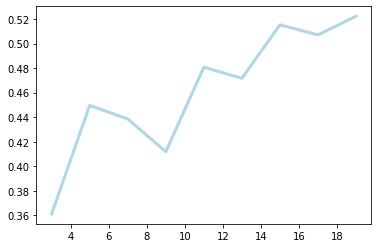

<Figure size 288x576 with 0 Axes>

In [ ]:
 import matplotlib.pyplot as plt
x = [3,5,7,9,11,13,15,17,19]
y = list(coherenceDict.values())
fig = plt.figure()
fig2 = plt.figure(figsize=plt.figaspect(2.0))
ax = fig.add_subplot(111)
ax.plot(x,y, color='lightblue', linewidth=3)
plt.show()

In [ ]:
 lda_model = lda_model_list[5] #11 is the topic count considered

In [ ]:
import pyLDAvis.gensim 
import pyLDAvis
# import pyLDAvis.gensim
# import pyLDAvis.gensimvis

pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

# # import pyLDAvis
# # import pyLDAvis.gensim_models
# vis = gensimvis.prepare(topic_model=lda_model, corpus=corpus, dictionary=id2word)
# pyLDAvis.enable_notebook()
# pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.073337 -0.189116       1        1  17.937153
12     0.135872  0.045774       2        1  13.091865
3      0.151896 -0.114880       3        1  12.400786
9      0.043432 -0.041673       4        1  10.600419
4      0.129520  0.039653       5        1   8.901174
11     0.016817  0.066007       6        1   7.164543
10    -0.040933 -0.114380       7        1   6.653106
6      0.128405  0.179601       8        1   5.465157
5     -0.119612 -0.111244       9        1   5.146035
0      0.001623  0.132845      10        1   4.791629
1     -0.027921  0.241605      11        1   3.076796
8     -0.086673 -0.214065      12        1   2.555128
2     -0.405764  0.079872      13        1   2.216211, topic_info=          Term           Freq          Total Category  logprob  loglift
193      trump   86869.000000   86869.000000  Default  30.0000  30.0000
165        say  208774.000000  208774.000000  Default  29.0000  29.0000
879    company   22032.000000   22032.000000  Default  28.0000  28.0000
594     police   24292.000000   24292.000000  Default  27.0000  27.0000
272   campaign   28804.000000   28804.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
3088     human    1212.860762    5840.494497  Topic13  -5.2075   2.2375
226       area    1378.401373    9411.933215  Topic13  -5.0796   1.8883
2018    damage     894.446275    3475.157389  Topic13  -5.5120   2.4522
615    process     881.412839    9343.878526  Topic13  -5.5267   1.4484
20       cause     861.388037    7038.376910  Topic13  -5.5497   1.7088

[875 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
44669      8  0.998542     aca
2251       2  0.040210  accord
2251       3  0.051079  accord
2251       5  0.276424  accord
2251       6  0.088660  accord
...      ...       ...     ...
203        9  0.076917    year
203       10  0.124745    year
203       12  0.044911    year
821        1  0.974766   young
821       10  0.025090   young

[2094 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 13, 4, 10, 5, 12, 11, 7, 6, 1, 2, 9, 3])

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.016*"year" + 0.012*"study" + 0.011*"number" + 0.011*"high" + '
  '0.011*"likely" + 0.011*"result" + 0.010*"percent" + 0.009*"test" + '
  '0.009*"drug" + 0.008*"risk"'),
 (1,
  '0.064*"company" + 0.019*"apple" + 0.017*"business" + 0.015*"product" + '
  '0.012*"sale" + 0.012*"employee" + 0.012*"customer" + 0.011*"share" + '
  '0.010*"store" + 0.010*"technology"'),
 (2,
  '0.026*"water" + 0.022*"food" + 0.012*"eat" + 0.009*"patient" + 0.008*"ship" '
  '+ 0.007*"warm" + 0.007*"scientist" + 0.007*"storm" + 0.006*"climate" + '
  '0.006*"area"'),
 (3,
  '0.070*"trump" + 0.033*"say" + 0.023*"campaign" + 0.022*"election" + '
  '0.017*"vote" + 0.013*"presidential" + 0.011*"candidate" + '
  '0.010*"republican" + 0.009*"voter" + 0.009*"win"'),
 (4,
  '0.037*"say" + 0.019*"report" + 0.014*"official" + 0.012*"tell" + '
  '0.012*"source" + 0.012*"email" + 0.011*"information" + 0.011*"case" + '
  '0.010*"investigation" + 0.010*"intelligence"'),
 (5,
  '0.028*"car" + 0.011*"event" + 0.010*"da

[(8,
  '0.033*"team" + 0.033*"game" + 0.021*"play" + 0.019*"season" + 0.017*"win" + 0.016*"player" + 0.011*"second" + 0.011*"year" + 0.011*"week" + 0.010*"final"'),
 (2,
  '0.026*"water" + 0.022*"food" + 0.012*"eat" + 0.009*"patient" + 0.008*"ship" + 0.007*"warm" + 0.007*"scientist" + 0.007*"storm" + 0.006*"climate" + 0.006*"area"'),
 (6,
  '0.023*"law" + 0.022*"state" + 0.015*"student" + 0.014*"federal" + 0.013*"rule" + 0.011*"issue" + 0.011*"public" + 0.010*"case" + 0.010*"court" + 0.009*"policy"'),
 (10,
  '0.041*"say" + 0.037*"police" + 0.024*"attack" + 0.023*"kill" + 0.022*"officer" + 0.013*"people" + 0.013*"vehicle" + 0.013*"shoot" + 0.012*"isis" + 0.009*"gun"'),
 (1,
  '0.064*"company" + 0.019*"apple" + 0.017*"business" + 0.015*"product" + 0.012*"sale" + 0.012*"employee" + 0.012*"customer" + 0.011*"share" + 0.010*"store" + 0.010*"technology"'),
 (3,
  '0.070*"trump" + 0.033*"say" + 0.023*"campaign" + 0.022*"election" + 0.017*"vote" + 0.013*"presidential" + 0.011*"candidate" + 0.

In [ ]:
lda_model(corpu[1])

NameError: ignored